# Impact of Covid-19 on EU Tourism

# Data Analysis Notebook

In [1]:
#Importing libraries for analysis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

In [2]:
#Ignore warnings and display all the rows in the dataframe
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')

# Read EU Local Tourism Data

In [3]:
url1= r'https://github.com/SindhuPrattipati/UDV1/raw/main/EU_TourismData.xlsx'

#  Hotels stay data

In [4]:
# Sheet 17 has the data for hotels stay
missing_values = ["NaN","n/a", "na", "---","","#","x",":"]
local_data_hotels= pd.read_excel(url1,sheet_name='Sheet 17',skiprows=9,index=None,na_values = missing_values,warn_bad_lines=False)

In [5]:
#Data Cleaning
local_data_hotels.shape
local_data_hotels.head()
local_data_hotels=local_data_hotels.dropna(axis=1,how='all',thresh=25)# delete null columns
local_data_hotels.shape
local_data_hotels=local_data_hotels.dropna(axis=0,how='all',thresh=5) #delete null rows
local_data_hotels

,TIME,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
1,European Union - 27 countries (from 2020),5.13,3.61,3.61,1.15,2.53,4.34,1.87,4.14,5.69,-61.34,-93.32,-84.85,-60.41,-25.99,-13.86,-20.38,-30.59,-71.81
2,Belgium,6.22,1.65,4.16,0.25,4.79,2.89,2.90,5.01,8.59,-64.48,-97.16,-95.31,-66.35,-19.59,-22.91,-16.02,-44.68,-71.90
3,Bulgaria,-0.65,11.29,13.16,4.44,3.55,13.05,6.73,20.60,21.22,-57.27,-93.40,-85.63,-60.66,-11.60,19.19,18.36,-13.33,-58.91
4,Czechia,3.89,0.61,5.96,-2.80,9.33,2.78,2.53,2.75,3.15,-48.81,-96.12,-85.73,-26.24,30.80,35.22,20.10,-50.63,-78.75
5,Denmark,7.57,15.23,8.24,4.14,6.02,5.42,2.84,2.48,6.43,-59.76,-87.63,-77.26,-75.98,25.66,-8.14,-16.83,-13.02,-37.98
6,Germany (until 1990 former territory of the FRG),4.01,3.61,3.85,1.11,4.66,5.34,2.59,3.18,7.98,-55.99,-89.72,-78.46,-43.55,-19.06,-10.21,-10.72,-7.70,-77.41
7,Estonia,4.32,3.35,6.62,2.32,5.30,10.91,-0.52,1.09,9.20,-56.50,-88.19,-70.31,-4.91,20.35,19.79,22.37,23.11,-4.09
9,Greece,9.63,-0.98,4.70,-3.38,10.02,1.05,-7.08,-17.15,-7.62,-69.11,-98.54,-96.22,-67.70,-33.04,-16.49,-37.67,-42.20,-71.92
10,Spain,6.9,4.84,4.06,1.14,-5.40,0.63,1.06,3.50,9.84,-64.57,-100.00,-97.84,-86.99,-50.01,-34.14,-45.13,-57.41,-75.20
11,France,9.31,4.59,4.92,4.28,3.55,5.82,5.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Data Transformation
local_data1 = pd.melt(local_data_hotels, id_vars=["TIME"], var_name="Year-Month", value_name="Tourism rate") #Convert columns to rows
local_data1[["Year", "Month"]]=local_data1["Year-Month"].str.split(pat="-", expand=True) #Split the year-month column
local_data1=local_data1.drop(['Year-Month'],axis=1) #drop year-month column
local_data1=local_data1.rename({'TIME':'Country'},axis=1) # rename the column
local_data1=local_data1[['Country','Year','Month','Tourism rate']] # re-arrange the columns
local_data1=local_data1[local_data1['Country']!='European Union - 27 countries (from 2020)'] #Drop Total value

In [7]:
# Extracting yearly data
hotels_local_data_2020= local_data1[local_data1['Year']=='2020'] #Extract 2020 data
hotels_local_data_2020= hotels_local_data_2020.astype({"Country": str, "Year": int,"Month":int,"Tourism rate":float}) #Set datatypes
hotels_local_data_2019= local_data1[local_data1['Year']=='2019'] #Extract 2019 data
hotels_local_data_2019= hotels_local_data_2019.astype({"Country": str, "Year": int,"Month":int,"Tourism rate":float}) #Set datatypes
hotels_local_data_2020 =hotels_local_data_2020.sort_values(by="Country", ascending=True) #Sort the dataframe by 'country' column values
hotels_local_data_2020=hotels_local_data_2020.groupby(['Country','Month'])['Tourism rate'].mean().reset_index() #Group by Country column

In [8]:
# Quarterly Data 

q1_months=['01','02','03']
q2_months=['04','05','06']
q3_months=['07','08','09']
q4_months=['10','11','12']

# Hotels ACComodation data -Quarter 1 local tourism data in 2020
hotels_data_q1_2020=hotels_local_data_2020[hotels_local_data_2020.Month.isin(q1_months)]
hotels_data_q1_2020=hotels_data_q1_2020.groupby(['Country'])['Tourism rate'].mean().reset_index()
hotels_data_q1_2020=hotels_data_q1_2020.rename({'Tourism rate':'Q1_avg_tourism_rate'},axis=1)

# Hotels ACComodation data -Quarter 2 local tourism data in 2020
hotels_data_q2_2020=hotels_local_data_2020[hotels_local_data_2020.Month.isin(q2_months)]
hotels_data_q2_2020=hotels_data_q2_2020.groupby(['Country'])['Tourism rate'].mean().reset_index()
hotels_data_q2_2020=hotels_data_q2_2020.rename({'Tourism rate':'Q2_avg_tourism_rate'},axis=1)

# Hotels ACComodation data -Quarter 3 local tourism data in 2020
hotels_data_q3_2020=hotels_local_data_2020[hotels_local_data_2020.Month.isin(q3_months)]
hotels_data_q3_2020=hotels_data_q3_2020.groupby(['Country'])['Tourism rate'].mean().reset_index()
hotels_data_q3_2020=hotels_data_q3_2020.rename({'Tourism rate':'Q3_avg_tourism_rate'},axis=1)

# Hotels ACComodation data -Quarter 4 local tourism data in 2020
hotels_data_q4_2020=hotels_local_data_2020[hotels_local_data_2020.Month.isin(q4_months)]
hotels_data_q4_2020=hotels_data_q4_2020.groupby(['Country'])['Tourism rate'].mean().reset_index()
hotels_data_q4_2020=hotels_data_q4_2020.rename({'Tourism rate':'Q4_avg_tourism_rate'},axis=1)

# Quarterly Data for hotels in 2020

hotels_quarterly_data=pd.merge(hotels_data_q1_2020,hotels_data_q2_2020,on='Country')
hotels_quarterly_data=pd.merge(hotels_quarterly_data,hotels_data_q3_2020,on='Country')
hotels_quarterly_data=pd.merge(hotels_quarterly_data,hotels_data_q4_2020,on='Country')
hotels_quarterly_data

,Country,Q1_avg_tourism_rate,Q2_avg_tourism_rate,Q3_avg_tourism_rate,Q4_avg_tourism_rate
0,Albania,19.560000,-51.610000,-15.230000,NaN
1,Austria,-18.133333,-68.450000,15.873333,-46.300
2,Belgium,-16.960000,-86.273333,-19.506667,-58.290
3,Bulgaria,-5.150000,-79.896667,8.650000,-36.120
4,Croatia,-17.843333,-80.996667,-1.526667,-57.410
5,Cyprus,-15.626667,-100.000000,NaN,NaN
6,Czechia,-14.303333,-69.363333,28.706667,-64.690
7,Denmark,-16.950000,-80.290000,0.230000,-25.500
8,Estonia,-15.403333,-54.470000,20.836667,9.510
9,Finland,-8.596667,-74.466667,-12.746667,-29.495


In [9]:
# Filter for countries with a positive quarterly tourism rate

hotels_pos_data_q1_2020= hotels_data_q1_2020[hotels_data_q1_2020['Q1_avg_tourism_rate']>0]
hotels_pos_data_q2_2020= hotels_data_q2_2020[hotels_data_q2_2020['Q2_avg_tourism_rate']>0]
hotels_pos_data_q3_2020= hotels_data_q3_2020[hotels_data_q3_2020['Q3_avg_tourism_rate']>0]
hotels_pos_data_q4_2020= hotels_data_q4_2020[hotels_data_q4_2020['Q4_avg_tourism_rate']>0]
hotels_pos_data_q1_2020['Accomodation_type']='Hotels'
hotels_pos_data_q2_2020['Accomodation_type']='Hotels'
hotels_pos_data_q3_2020['Accomodation_type']='Hotels'
hotels_pos_data_q4_2020['Accomodation_type']='Hotels'

# Other Accomodation Data- Camping grounds, trailer parks etc.

In [11]:
missing_values = ["NaN","n/a", "na", "---","","#","x",":"]
local_data_camps= pd.read_excel(url1,sheet_name='Sheet 20',skiprows=9,index=None,na_values = missing_values,warn_bad_lines=False)

In [12]:
#Data Cleaning
local_data_camps.shape
local_data_camps.head()
local_data_camps=local_data_camps.dropna(axis=1,how='all',thresh=25)# delete null columns
local_data_camps.shape
local_data_camps=local_data_camps.dropna(axis=0,how='all',thresh=5) #delete null rows
local_data_camps

,TIME,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10
1,European Union - 27 countries (from 2020),24.77,3.46,2.85,1.09,1.21,4.87,5.10,3.27,4.56,-55.66,-90.84,-61.82,-42.13,-18.18,-13.81,2.00,69.12
2,Belgium,10.97,-8.02,-4.66,-2.95,-7.04,-12.36,17.74,-25.29,-24.13,-67.07,-100.00,-100.00,-2.56,53.88,60.62,118.47,-9.97
3,Bulgaria,33.63,2.00,11.70,101.32,NaN,NaN,NaN,NaN,NaN,NaN,-100.00,NaN,-52.19,-0.22,6.12,56.43,NaN
4,Czechia,21.37,-0.69,6.15,4.77,27.88,-31.01,38.08,-46.57,-39.78,-62.66,-99.47,-86.49,-39.42,14.09,24.58,15.47,899.99
5,Denmark,4.07,-2.56,-3.64,-2.59,-6.84,-0.28,1.41,-1.72,0.70,-33.10,-33.38,6.30,-16.14,27.15,23.82,17.93,23.19
6,Germany (until 1990 former territory of the FRG),52.57,1.37,4.36,-0.73,5.88,-1.76,14.88,25.60,21.61,-58.02,-99.10,-26.63,-1.24,8.32,21.60,66.91,137.85
7,Estonia,143.9,293.02,19.74,22.73,-91.00,NaN,NaN,-100.00,-100.00,-100.00,-100.00,-100.00,-89.50,327.22,-81.54,29.63,-55.56
9,Greece,36.69,3.85,5.46,25.88,86.66,59.46,-16.52,-71.02,-68.25,-91.85,-100.00,-100.00,-69.73,-25.17,-14.51,-60.02,-60.65
10,Spain,18.87,6.44,6.05,-0.71,-3.00,6.37,1.62,13.56,24.05,-72.15,-100.00,-95.05,-57.95,-11.44,-10.32,2.07,4.46
11,France,26.07,3.94,2.15,2.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Data Transformation
local_data2 = pd.melt(local_data_camps, id_vars=["TIME"], var_name="Year-Month", value_name="Tourism rate") #Convert columns to rows
local_data2[["Year", "Month"]]=local_data2["Year-Month"].str.split(pat="-", expand=True) #Split the year-month column
local_data2=local_data2.drop(['Year-Month'],axis=1) #drop year-month column
local_data2=local_data2.rename({'TIME':'Country'},axis=1) # rename the column
local_data2=local_data2[['Country','Year','Month','Tourism rate']] # re-arrange the columns
local_data2=local_data2[local_data2['Country']!='European Union - 27 countries (from 2020)']

In [14]:
# Extracting yearly data
local_data_camps_2020= local_data2[local_data2['Year']=='2020'] #Extract 2020 data
local_data_camps_2020= local_data_camps_2020.astype({"Country": str, "Year": int,"Month":int,"Tourism rate":float}) #Set datatypes
local_data_camps_2019= local_data2[local_data2['Year']=='2019'] #Extract 2019 data
local_data_camps_2019= local_data_camps_2019.astype({"Country": str, "Year": int,"Month":int,"Tourism rate":float}) #Set datatypes
local_data_camps_2020 = local_data_camps_2020.sort_values(by="Country", ascending=True) #Sort the dataframe by 'country' column values
local_data_camps_2020=local_data_camps_2020.groupby(['Country','Month'])['Tourism rate'].mean().reset_index() #Group by Country column

In [15]:
# Quarterly Data in camps,trailer parks etc. in 2020

q1_months=['01','02','03']
q2_months=['04','05','06']
q3_months=['07','08','09']
q4_months=['10','11','12']

# Hotels ACComodation data -Quarter 1 local tourism data in 2020
camps_data_q1_2020=local_data_camps_2020[local_data_camps_2020.Month.isin(q1_months)]
camps_data_q1_2020=camps_data_q1_2020.groupby(['Country'])['Tourism rate'].mean().reset_index()
camps_data_q1_2020=camps_data_q1_2020.rename({'Tourism rate':'Q1_avg_tourism_rate'},axis=1)

# Hotels ACComodation data -Quarter 2 local tourism data in 2020
camps_data_q2_2020=local_data_camps_2020[local_data_camps_2020.Month.isin(q2_months)]
camps_data_q2_2020=camps_data_q2_2020.groupby(['Country'])['Tourism rate'].mean().reset_index()
camps_data_q2_2020=camps_data_q2_2020.rename({'Tourism rate':'Q2_avg_tourism_rate'},axis=1)

# Hotels ACComodation data -Quarter 3 local tourism data in 2020
camps_data_q3_2020=local_data_camps_2020[local_data_camps_2020.Month.isin(q3_months)]
camps_data_q3_2020=camps_data_q3_2020.groupby(['Country'])['Tourism rate'].mean().reset_index()
camps_data_q3_2020=camps_data_q3_2020.rename({'Tourism rate':'Q3_avg_tourism_rate'},axis=1)

# Hotels ACComodation data -Quarter 4 local tourism data in 2020
camps_data_q4_2020=local_data_camps_2020[local_data_camps_2020.Month.isin(q4_months)]
camps_data_q4_2020=camps_data_q4_2020.groupby(['Country'])['Tourism rate'].mean().reset_index()
camps_data_q4_2020=camps_data_q4_2020.rename({'Tourism rate':'Q4_avg_tourism_rate'},axis=1)

# Quarterly Data for camps,trailer parks etc.in 2020

camps_quarterly_data=pd.merge(camps_data_q1_2020,camps_data_q2_2020,on='Country')
camps_quarterly_data=pd.merge(camps_quarterly_data,camps_data_q3_2020,on='Country')
camps_quarterly_data=pd.merge(camps_quarterly_data,camps_data_q4_2020,on='Country')

In [16]:
# Filter for countries with a positive quarterly tourism rate in camps

camps_pos_data_q1_2020= camps_data_q1_2020[camps_data_q1_2020['Q1_avg_tourism_rate']>0]
camps_pos_data_q2_2020= camps_data_q2_2020[camps_data_q2_2020['Q2_avg_tourism_rate']>0]
camps_pos_data_q3_2020= camps_data_q3_2020[camps_data_q3_2020['Q3_avg_tourism_rate']>0]
camps_pos_data_q4_2020= camps_data_q4_2020[camps_data_q4_2020['Q4_avg_tourism_rate']>0]

camps_pos_data_q1_2020['Accomodation_type']='camps'
camps_pos_data_q2_2020['Accomodation_type']='camps'
camps_pos_data_q3_2020['Accomodation_type']='camps'
camps_pos_data_q4_2020['Accomodation_type']='camps'

# Other Accomodation- Holiday and other Short stay Accomodation Data

In [18]:
missing_values = ["NaN","n/a", "na", "---","","#","x",":"]
local_data_holiday= pd.read_excel(url1,sheet_name='Sheet 19',skiprows=9,index=None,na_values = missing_values,warn_bad_lines=False)

In [19]:
#Data Cleaning
local_data_holiday.shape
local_data_holiday.head()
local_data_holiday=local_data_holiday.dropna(axis=1,how='all',thresh=25)# delete null columns
local_data_holiday.shape
local_data_holiday=local_data_holiday.dropna(axis=0,how='all',thresh=5) #delete null rows
local_data_holiday

,TIME,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
1,European Union - 27 countries (from 2020),8.98,5.06,3.93,2.18,4.34,4.44,3.35,4.16,7.66,-55.55,-92.68,-79.40,-49.54,-18.59,-6.86,-12.79,-21.23,-62.94
2,Belgium,16.04,1.63,3.07,3.94,9.21,6.15,2.57,5.40,25.77,-67.85,-100.00,-100.00,-58.33,8.90,5.25,-1.57,-39.88,-50.11
3,Bulgaria,4.53,8.34,5.36,10.40,-5.97,3.01,2.67,27.97,19.90,-48.65,-89.93,NaN,-59.00,-33.93,-12.11,1.95,NaN,NaN
4,Czechia,3.5,4.90,7.17,0.48,10.21,5.93,4.41,5.65,3.15,-37.74,-95.98,-79.01,-44.56,-1.62,1.19,-9.79,-50.63,-68.67
5,Denmark,10.15,9.35,-0.28,-5.82,-0.72,-1.22,-1.67,-7.88,1.12,-50.25,-78.18,-71.43,-68.12,43.55,14.79,4.15,3.77,-29.43
6,Germany (until 1990 former territory of the FRG),19.6,9.51,5.10,4.99,10.77,7.05,7.71,4.18,16.77,-52.13,-95.32,-72.22,-30.51,-14.13,-2.76,-5.21,-1.56,-80.91
7,Estonia,16.93,3.94,6.35,16.85,1.75,11.39,5.65,-12.15,-9.30,-36.75,-53.87,-47.03,-33.98,-8.70,-2.98,-14.67,-9.10,-20.85
9,Greece,4.3,-7.72,-5.19,-12.67,0.55,-10.10,-18.74,-57.45,-19.19,-82.40,-100.00,-100.00,-75.12,-62.41,-19.71,-49.21,-55.87,-92.04
10,Spain,5.93,0.63,4.38,-2.28,-7.59,0.95,-2.85,6.89,14.93,-71.83,-100.00,-94.27,-78.57,-26.65,-11.44,-24.74,-32.40,-64.50
11,France,7.06,6.25,1.46,-2.94,-1.18,-1.03,1.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Data Transformation
local_data3 = pd.melt(local_data_holiday, id_vars=["TIME"], var_name="Year-Month", value_name="Tourism rate") #Convert columns to rows
local_data3[["Year", "Month"]]=local_data3["Year-Month"].str.split(pat="-", expand=True) #Split the year-month column
local_data3=local_data3.drop(['Year-Month'],axis=1) #drop year-month column
local_data3=local_data3.rename({'TIME':'Country'},axis=1) # rename the column
local_data3=local_data3[['Country','Year','Month','Tourism rate']] # re-arrange the columns
local_data3=local_data3[local_data3['Country']!='European Union - 27 countries (from 2020)']

In [21]:
# Extracting yearly data
local_data_holiday_2020= local_data3[local_data3['Year']=='2020'] #Extract 2020 data
local_data_holiday_2020= local_data_holiday_2020.astype({"Country": str, "Year": int,"Month":int,"Tourism rate":float}) #Set datatypes
local_data_holiday_2019= local_data3[local_data3['Year']=='2019'] #Extract 2019 data
local_data_holiday_2019= local_data_holiday_2019.astype({"Country": str, "Year": int,"Month":int,"Tourism rate":float}) #Set datatypes
local_data_holiday_2020 = local_data_holiday_2020.sort_values(by="Country", ascending=True) #Sort the dataframe by 'country' column values
local_data_holiday_2020=local_data_holiday_2020.groupby(['Country','Month'])['Tourism rate'].mean().reset_index() #Group by Country column

In [22]:
# Quarterly Data in camps,trailer parks etc. in 2020

q1_months=['01','02','03']
q2_months=['04','05','06']
q3_months=['07','08','09']
q4_months=['10','11','12']

# Hotels ACComodation data -Quarter 1 local tourism data in 2020
holiday_data_q1_2020=local_data_holiday_2020[local_data_holiday_2020.Month.isin(q1_months)]
holiday_data_q1_2020=holiday_data_q1_2020.groupby(['Country'])['Tourism rate'].mean().reset_index()
holiday_data_q1_2020=holiday_data_q1_2020.rename({'Tourism rate':'Q1_avg_tourism_rate'},axis=1)

# Hotels ACComodation data -Quarter 2 local tourism data in 2020
holiday_data_q2_2020=local_data_holiday_2020[local_data_holiday_2020.Month.isin(q2_months)]
holiday_data_q2_2020=holiday_data_q2_2020.groupby(['Country'])['Tourism rate'].mean().reset_index()
holiday_data_q2_2020=holiday_data_q2_2020.rename({'Tourism rate':'Q2_avg_tourism_rate'},axis=1)

# Hotels ACComodation data -Quarter 3 local tourism data in 2020
holiday_data_q3_2020=local_data_holiday_2020[local_data_holiday_2020.Month.isin(q3_months)]
holiday_data_q3_2020=holiday_data_q3_2020.groupby(['Country'])['Tourism rate'].mean().reset_index()
holiday_data_q3_2020=holiday_data_q3_2020.rename({'Tourism rate':'Q3_avg_tourism_rate'},axis=1)

# Hotels ACComodation data -Quarter 4 local tourism data in 2020
holiday_data_q4_2020=local_data_holiday_2020[local_data_holiday_2020.Month.isin(q4_months)]
holiday_data_q4_2020=holiday_data_q4_2020.groupby(['Country'])['Tourism rate'].mean().reset_index()
holiday_data_q4_2020=holiday_data_q4_2020.rename({'Tourism rate':'Q4_avg_tourism_rate'},axis=1)

# Quarterly Data for holiday and short stay accomodation in 2020

#--quarterly_data=pd.concat([holiday_data_q1_2020,holiday_data_q2_2020,holiday_data_q3_2020,holiday_data_q4_2020],axis=1,join='outer')
holiday_quarterly_data=pd.merge(holiday_data_q1_2020,holiday_data_q2_2020,on='Country')
holiday_quarterly_data=pd.merge(holiday_quarterly_data,holiday_data_q3_2020,on='Country')
holiday_quarterly_data=pd.merge(holiday_quarterly_data,holiday_data_q4_2020,on='Country')

In [23]:
# Filter for countries with a positive quarterly tourism rate in camps

holiday_pos_data_q1_2020= holiday_data_q1_2020[holiday_data_q1_2020['Q1_avg_tourism_rate']>0]
holiday_pos_data_q2_2020=holiday_data_q2_2020[holiday_data_q2_2020['Q2_avg_tourism_rate']>0]
holiday_pos_data_q3_2020= holiday_data_q3_2020[holiday_data_q3_2020['Q3_avg_tourism_rate']>0]
holiday_pos_data_q4_2020= holiday_data_q4_2020[holiday_data_q4_2020['Q4_avg_tourism_rate']>0]

holiday_pos_data_q1_2020['Accomodation_type']='holiday'
holiday_pos_data_q2_2020['Accomodation_type']='holiday'
holiday_pos_data_q3_2020['Accomodation_type']='holiday'
holiday_pos_data_q4_2020['Accomodation_type']='holiday'

# Data Analysis & Data Visualization

In [55]:
# ALL positive stay rates across different accomodations in different countries- per quarter
q1_data=pd.concat([hotels_pos_data_q1_2020,camps_pos_data_q1_2020,holiday_pos_data_q1_2020],axis=0)
q2_data=pd.concat([hotels_pos_data_q2_2020,camps_pos_data_q2_2020,holiday_pos_data_q2_2020],axis=0)
q3_data=pd.concat([hotels_pos_data_q3_2020,camps_pos_data_q3_2020,holiday_pos_data_q3_2020],axis=0)
q4_data=pd.concat([hotels_pos_data_q4_2020,camps_pos_data_q4_2020,holiday_pos_data_q4_2020],axis=0)
q1_data.sort_values(by='Country')
q2_data.sort_values(by='Country')
q3_data.sort_values(by='Country')
q4_data.sort_values(by='Country')

,Country,Q4_avg_tourism_rate,Accomodation_type
1,Austria,42.990,camps
6,Czechia,899.990,camps
7,Denmark,23.190,camps
8,Estonia,9.510,Hotels
9,Finland,21.810,camps
8,Finland,12.380,holiday
11,Germany (until 1990 former territory of the FRG),137.850,camps
13,Hungary,12.270,camps
13,Iceland,10.960,holiday
18,Liechtenstein,4.595,Hotels


Text(0.5, 1.0, 'Grouped Barplot for countries with a positive tourism rate in quarter 1')

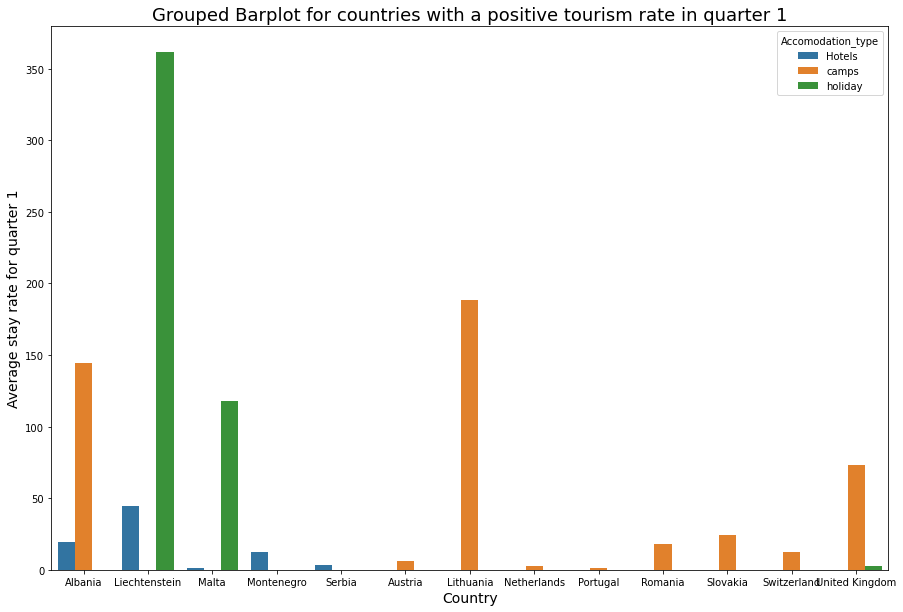

In [41]:
# Quarter 1 accomodation rates for countries with a positive tourism rate
plt.figure(figsize=(15, 10))
sns.barplot(x="Country", y="Q1_avg_tourism_rate", hue="Accomodation_type", data=q1_data)
plt.ylabel("Average stay rate for quarter 1", size=14)
plt.xlabel("Country", size=14)
plt.title("Grouped Barplot displaying country wise stay rates in quarter 1", size=18)

Text(0.5, 1.0, 'Grouped Barplot for countries with a positive tourism rate in quarter 2')

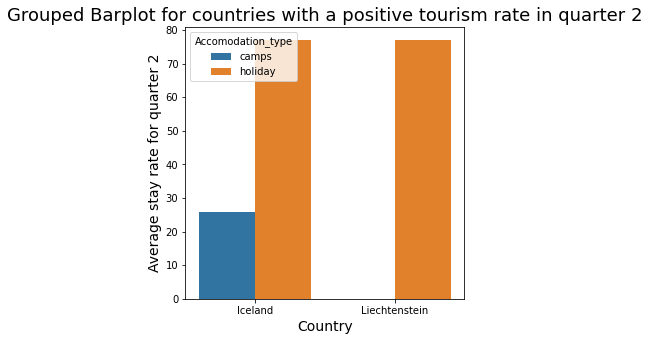

In [47]:
# Quarter 2 accomodation rates for countries with a positive tourism rate
plt.figure(figsize=(5, 5))
sns.barplot(x="Country", y="Q2_avg_tourism_rate", hue="Accomodation_type", data=q2_data)
plt.ylabel("Average stay rate for quarter 2", size=14)
plt.xlabel("Country", size=14)
plt.title("Grouped Barplot displaying country wise stay rates in quarter 2", size=18)

Text(0.5, 1.0, 'Grouped Barplot showing countries with a positive tourism rate in quarter 3')

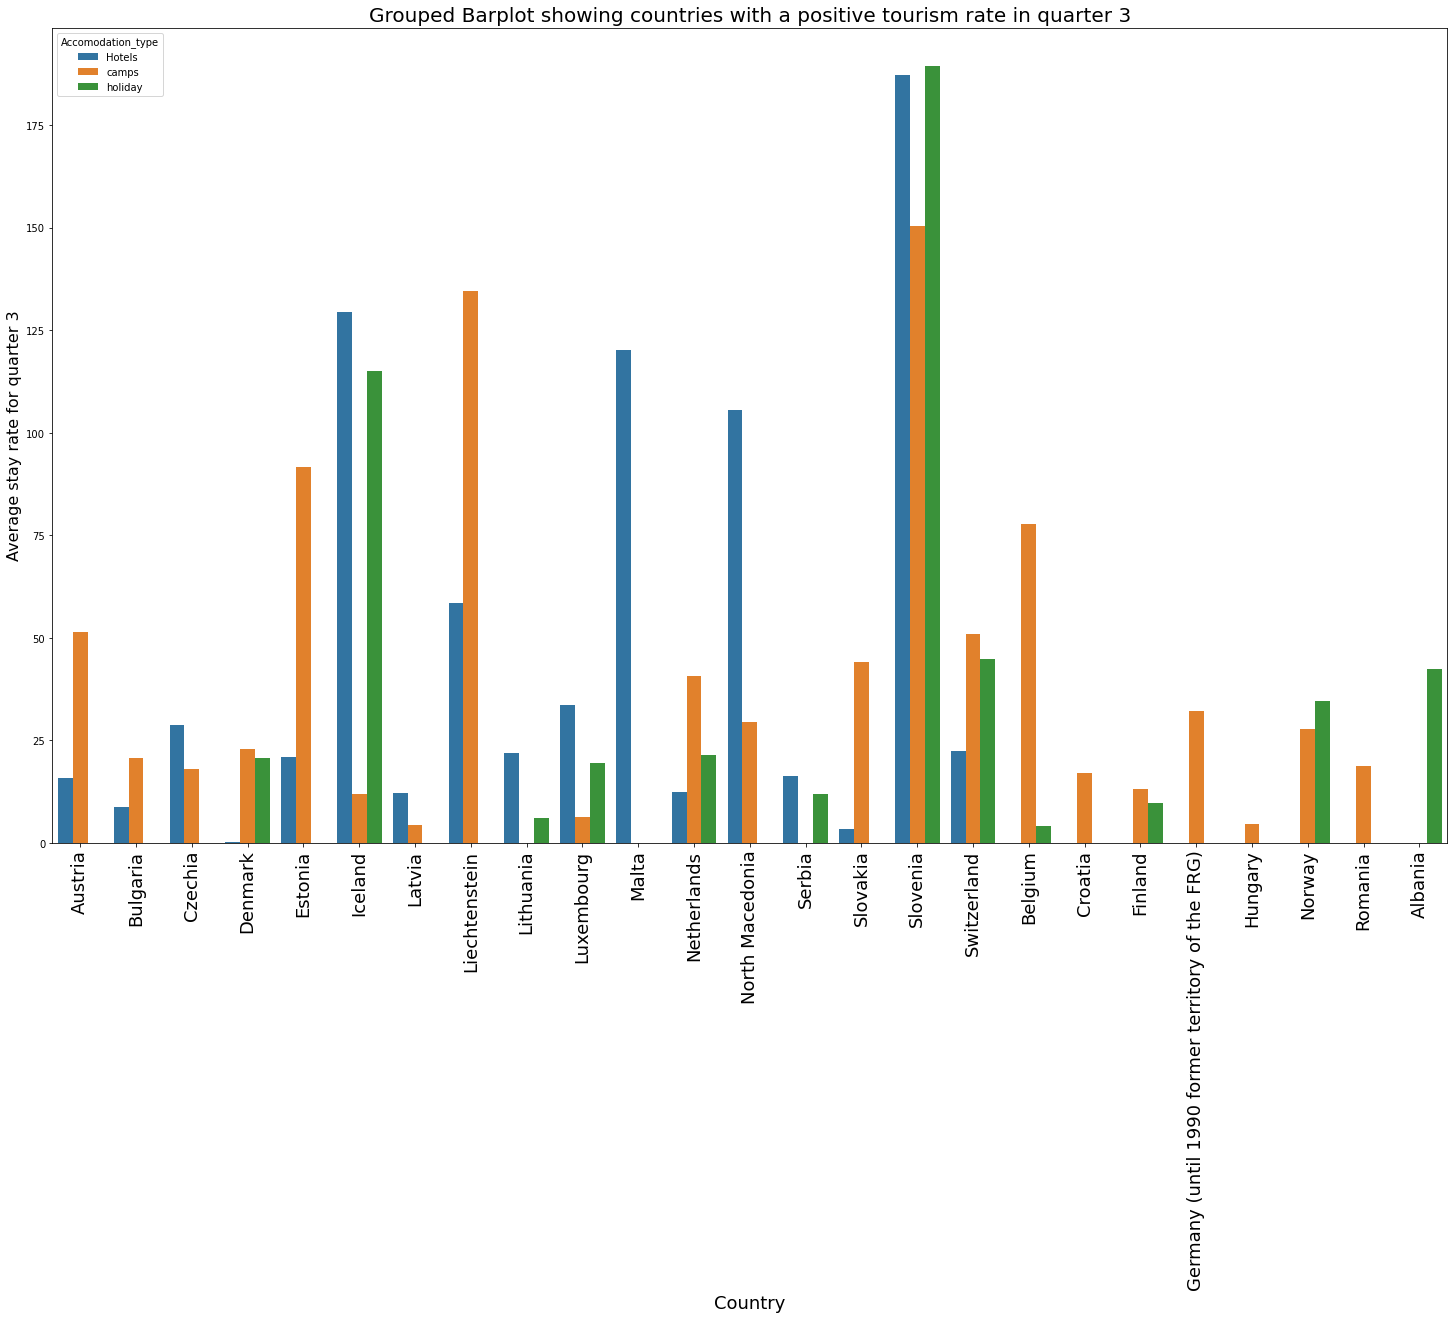

In [66]:
# Quarter 2 accomodation rates for countries with a positive tourism rate
plt.figure(figsize=(25, 15))
sns.barplot(x="Country", y="Q3_avg_tourism_rate", hue="Accomodation_type", data=q3_data)
plt.ylabel("Average stay rate for quarter 3", size=16)
plt.xlabel("Country", size=18)
plt.xticks(rotation=90,size=18)
plt.title("Grouped Barplot showing countries with a positive tourism rate in quarter 3", size=20)

Text(0.5, 1.0, 'Grouped Barplot showing countries with a positive tourism rate in quarter 4')

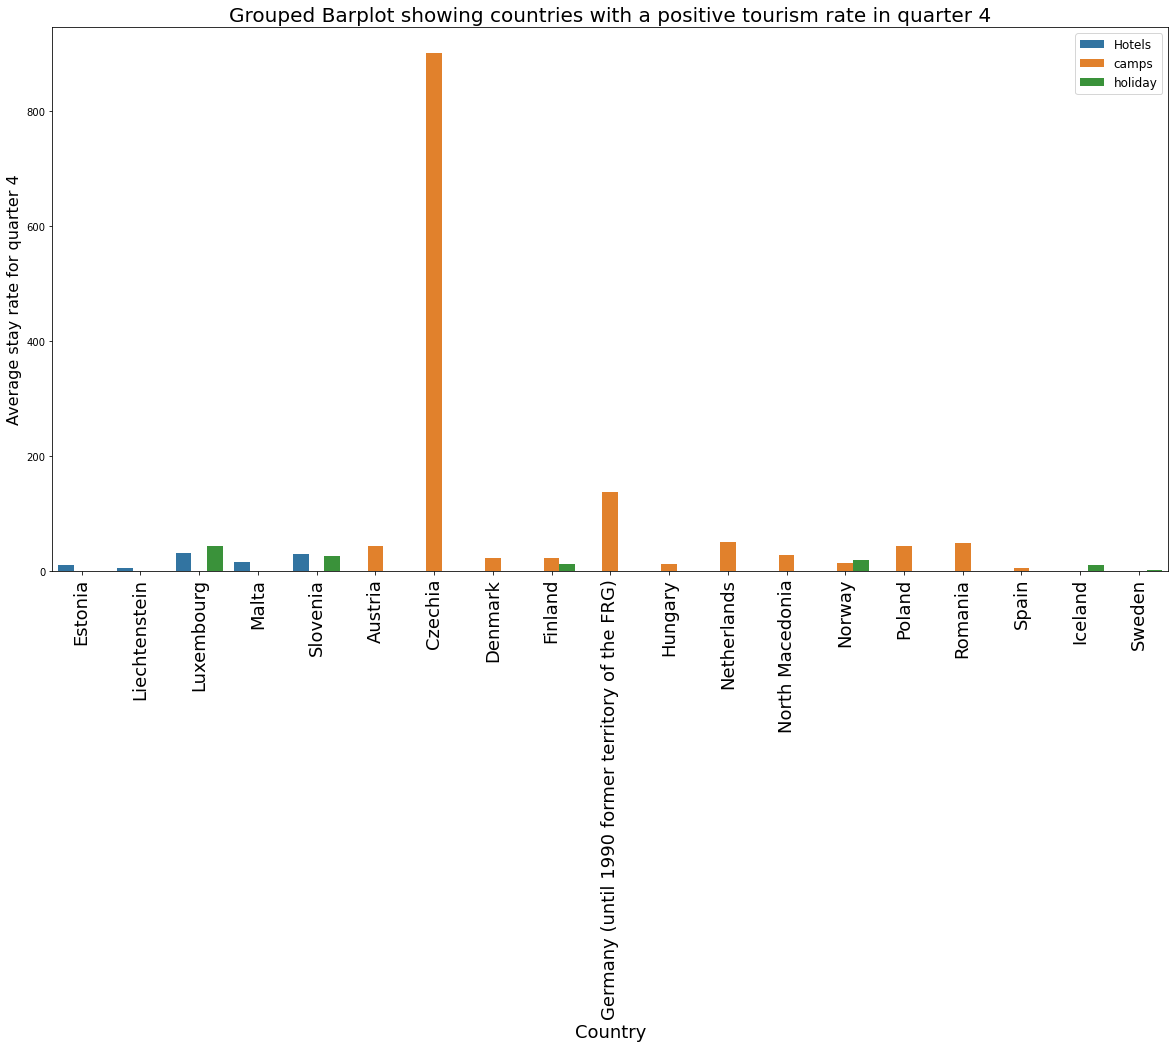

In [77]:
plt.figure(figsize=(20, 10))
sns.barplot(x="Country", y="Q4_avg_tourism_rate", hue="Accomodation_type", data=q4_data)
plt.ylabel("Average stay rate for quarter 4", size=16)
plt.xlabel("Country", size=18)
plt.xticks(rotation=90,size=18)
plt.legend(fontsize='large')
plt.title("Grouped Barplot showing countries with a positive tourism rate in quarter 4", size=20)

# Country-wise Quarterly Data -Local Tourism/ Visitor rate in hotels, camps, short stays

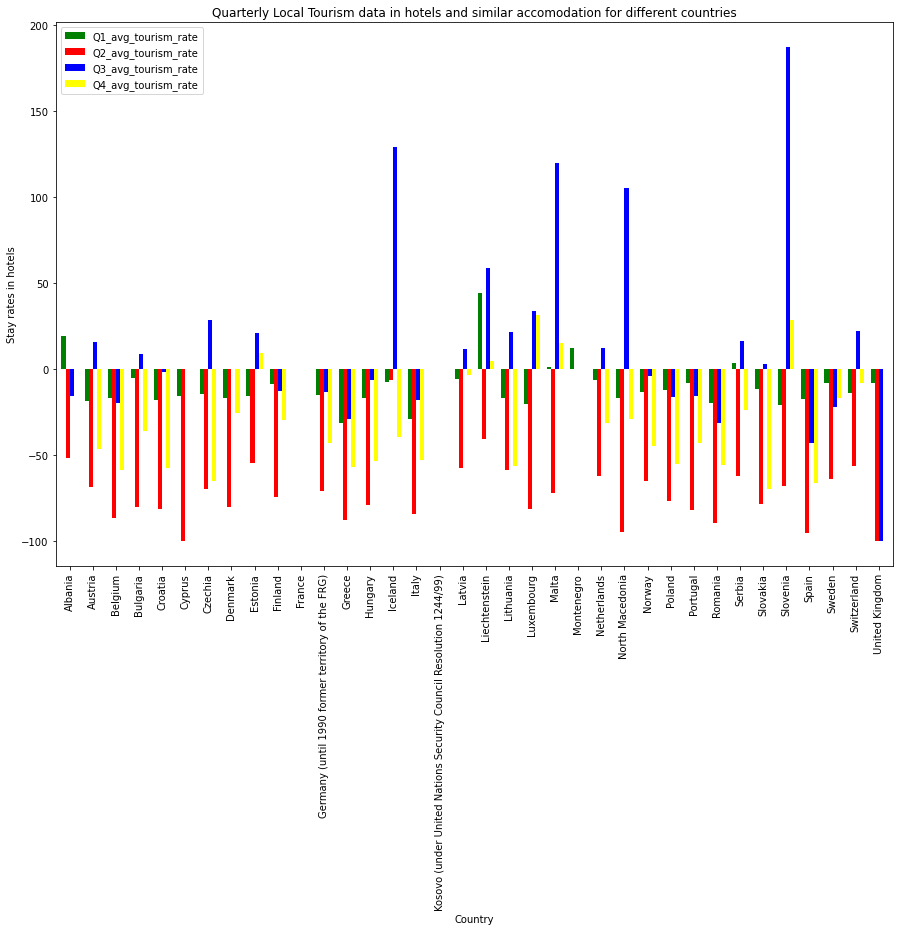

In [25]:
# 1) Hotels and similar accomodation stay-Local Tourism visualization- quarterly

ax = hotels_quarterly_data.plot.bar(rot=90, color=['green','red','blue','yellow'],figsize=(15, 10),width=0.7)
ax.set_xticklabels(hotels_quarterly_data.Country)
plt.title('Quarterly Local Tourism data in hotels and similar accomodation for different countries')
plt.xlabel('Country')
plt.ylabel('Stay rates in hotels')
plt.show()

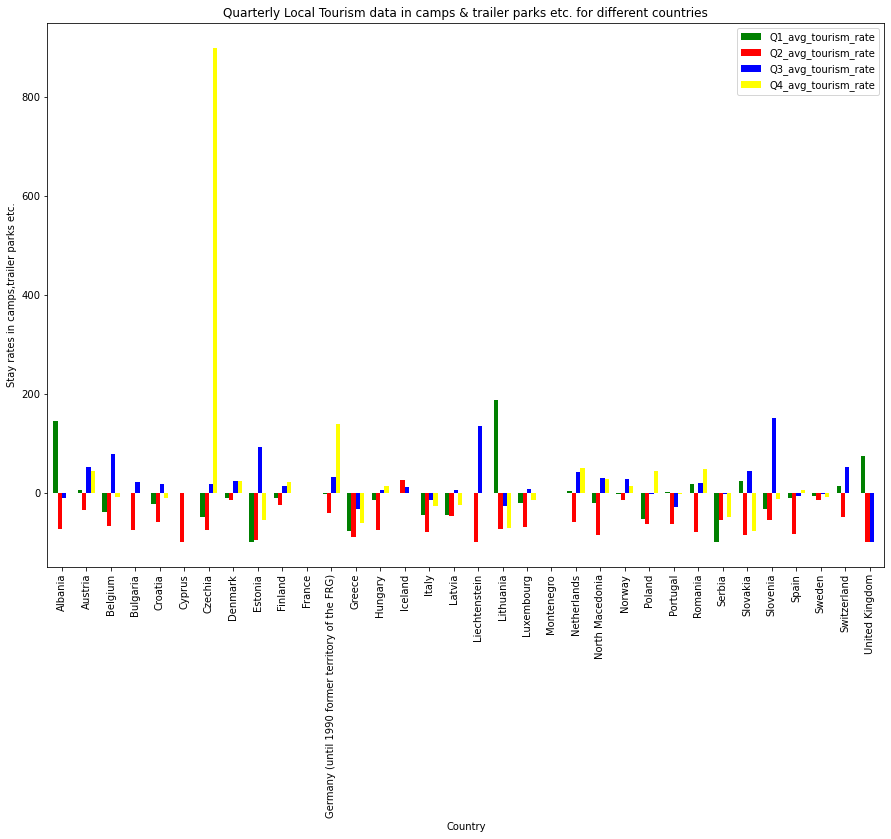

In [26]:
# 2) Camps & Trailer parks-Local Tourism visualization- quarterly

ax = camps_quarterly_data.plot.bar(rot=90, color=['green','red','blue','yellow'],figsize=(15, 10),width=0.7)
ax.set_xticklabels(camps_quarterly_data.Country)
plt.title('Quarterly Local Tourism data in camps & trailer parks etc. for different countries')
plt.xlabel('Country')
plt.ylabel('Stay rates in camps,trailer parks etc.')
plt.show()

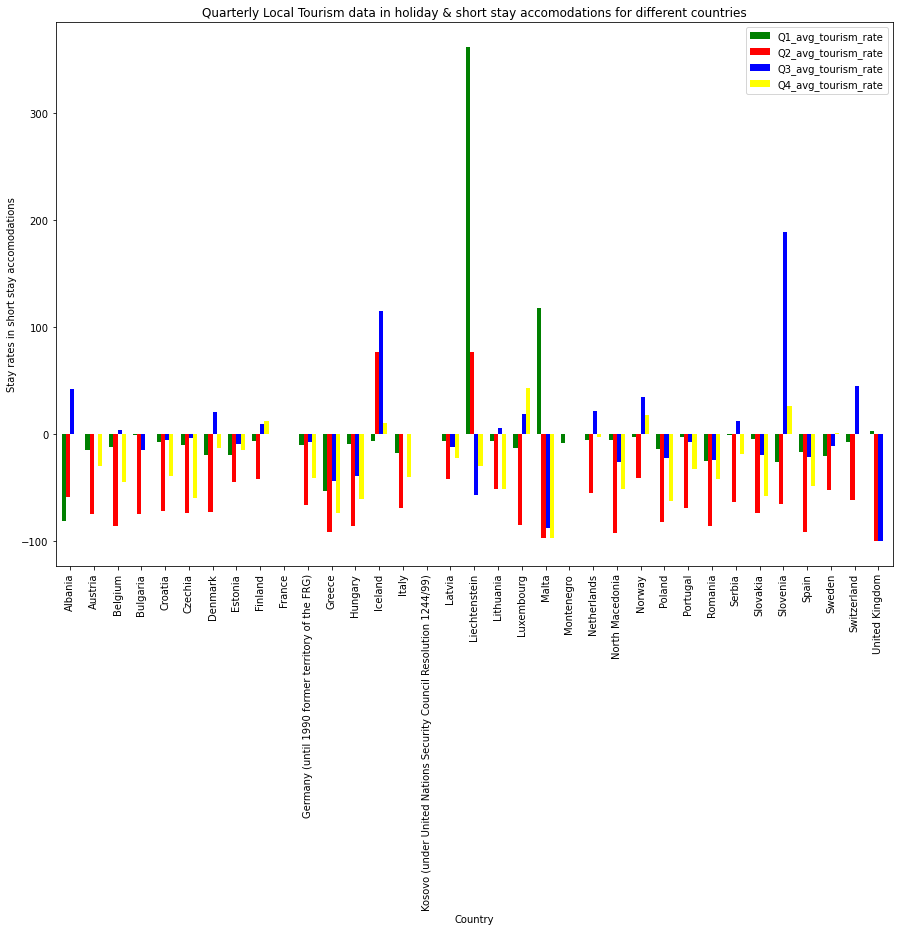

In [27]:
# 3) Holiday and short stay accomadation stay-Local Tourism visualization- quarterly

ax = holiday_quarterly_data.plot.bar(rot=90, color=['green','red','blue','yellow'],figsize=(15, 10),width=0.7)
ax.set_xticklabels(holiday_quarterly_data.Country)
plt.title('Quarterly Local Tourism data in holiday & short stay accomodations for different countries')
plt.xlabel('Country')
plt.ylabel('Stay rates in short stay accomodations')
#--ax.set_xticks(np.arange(0, 38, step=1))
plt.show()

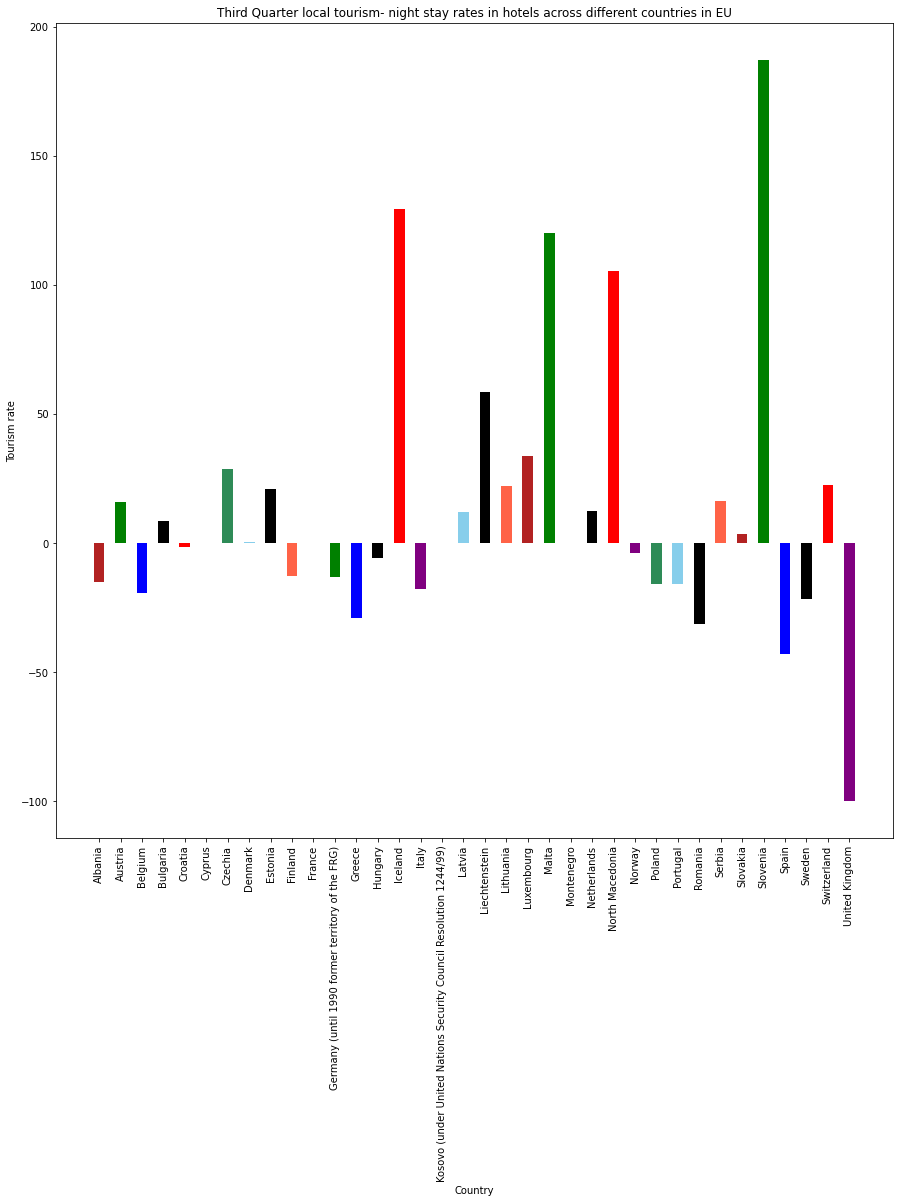

In [78]:
# creating the bar plots 
fig = plt.figure(figsize = (15, 15)) 
plt.title('Third Quarter local tourism- night stay rates in hotels across different countries in EU')
plt.bar(hotels_data_q3_2020['Country'],hotels_data_q3_2020['Q3_avg_tourism_rate'], color=['firebrick', 'green', 'blue', 'black', 'red',
                    'purple', 'seagreen', 'skyblue', 'black', 'tomato'],width = 0.5) 
plt.ylabel('Tourism rate')
plt.xlabel('Country')
plt.xticks(hotels_data_q3_2020['Country'],rotation=90) #labelling and rotation
plt.show()

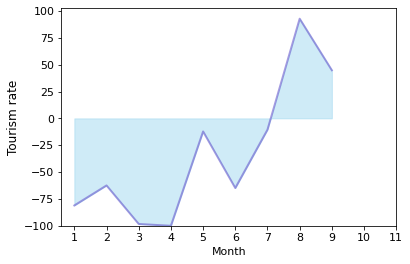

In [30]:
# Area Graph example

a=local_data_holiday_2020[local_data_holiday_2020['Country']=='Albania']
a
plt.fill_between(np.arange(11), a['Tourism rate'],color="skyblue", alpha=0.4)
plt.plot(np.arange(11), a['Tourism rate'], color="Slateblue", alpha=0.6, linewidth=2)
plt.tick_params(labelsize=11)
plt.xticks(np.arange(11), np.arange(1,12))
plt.xlabel('Month', size=11)
plt.ylabel('Tourism rate', size=12)
plt.ylim(bottom=-100)
plt.show()